In [59]:
import numpy as np 
from scipy.integrate import odeint
import os, sys 
from pathlib import Path
from os.path import dirname, realpath
script_dir = Path(dirname(realpath('.')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
import utility as ut
import surrogate1 as sr1
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
# warnings.filterwarnings('ignore')

In [60]:
def get_cn(W):
    c = []
    for col in np.abs(W.T):
        c.append(np.max(col))
    return sorted(c)

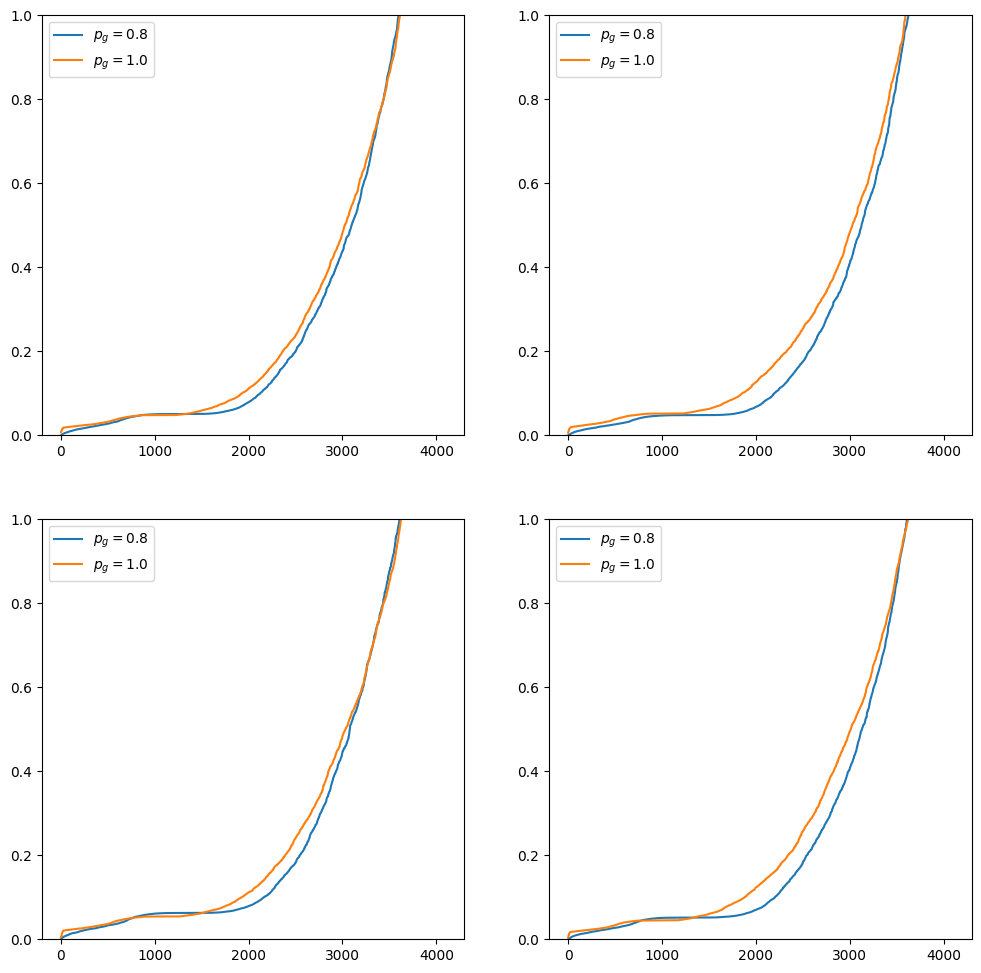

In [66]:
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
axs = [ax1, ax2, ax3, ax4]
# ax = fig.add_subplot(111, frameon=False)
save_folders = '../data/L63-Strategy-varying-featuresize/'
bsa = sr1.BatchStrategyAnalyzer_SMLR(save_folders + str(D_r))

D_r = 4096
p_g = 0.8
n = int(p_g/0.02)
a, b, c, d = 500*n + 1, 500*n + 2, 500*n + 3, 500*n + 4

for i, j in enumerate([a, b, c, d]):
    W = bsa.get_model(j).W
    axs[i].plot(get_cn(W), label=r'$p_g=0.8$')
    axs[i].legend()

p_g = 1.0
n = int(p_g/0.02)
a, b, c, d = 500*n + 1, 500*n + 2, 500*n + 3, 500*n + 4
for i, j in enumerate([a, b, c, d]):
    W = bsa.get_model(j).W
    axs[i].plot(get_cn(W), label=r'$p_g=1.0$')
    axs[i].legend()
    axs[i].set_ylim((0, 1))

ax.set_xlabel(r'$j$')
ax.set_ylabel(r'$\|\mathbf{W}^{j}\|_\infty$')
plt.savefig('../data/plots/col-norm-4096-1.png')

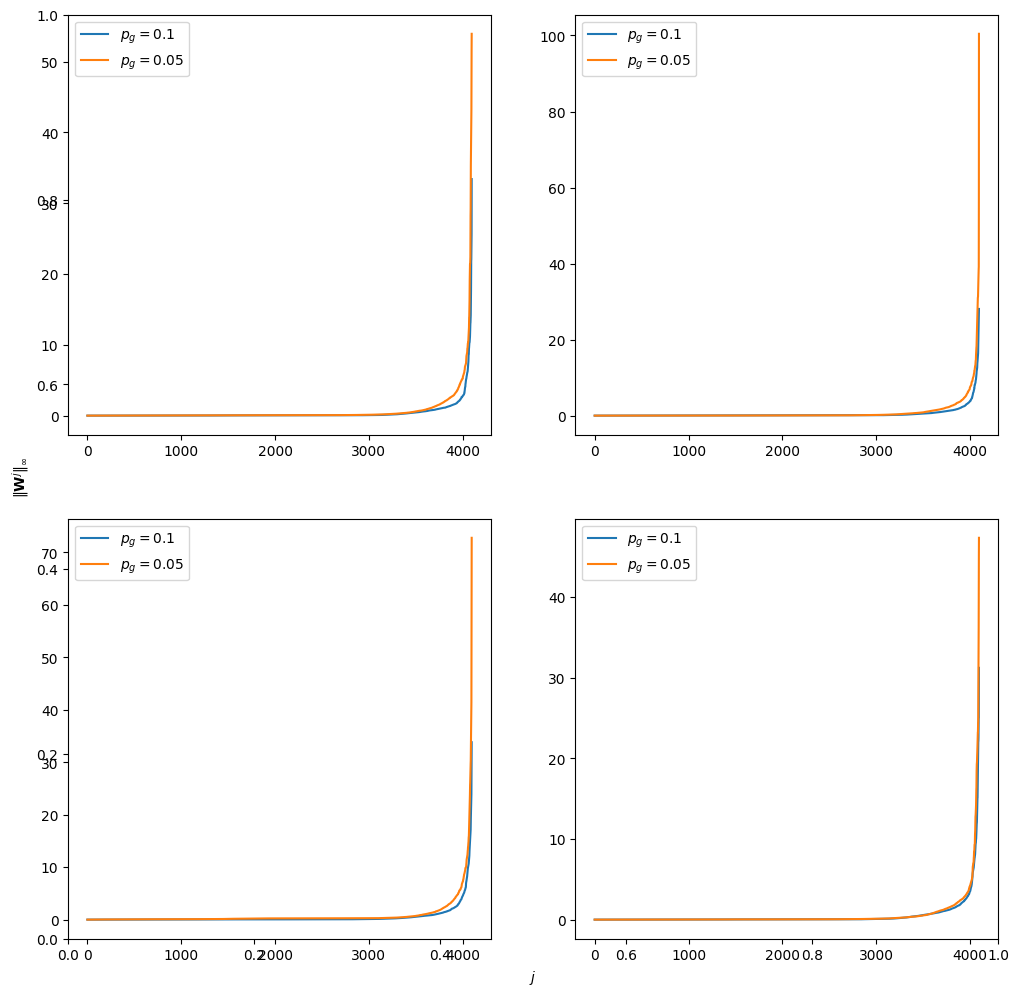

In [56]:
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
axs = [ax1, ax2, ax3, ax4]
ax = fig.add_subplot(111, frameon=False)
save_folders = '../data/L63-Strategy-varying-featuresize/'
bsa = sr1.BatchStrategyAnalyzer_SMLR(save_folders + str(D_r))

D_r = 4096
p_g = 0.1
n = int(p_g/0.02)
a, b, c, d = 500*n + 1, 500*n + 2, 500*n + 3, 500*n + 4

for i, j in enumerate([a, b, c, d]):
    W = bsa.get_model(j).W
    axs[i].plot(get_cn(W), label=r'$p_g=0.1$')
    axs[i].legend()

p_g = 0.05
n = int(p_g/0.02)
a, b, c, d = 500*n + 1, 500*n + 2, 500*n + 3, 500*n + 4
for i, j in enumerate([a, b, c, d]):
    W = bsa.get_model(j).W
    axs[i].plot(get_cn(W), label=r'$p_g=0.05$')
    axs[i].legend()

ax.set_xlabel(r'$j$')
ax.set_ylabel(r'$\|\mathbf{W}^{j}\|_\infty$')
plt.savefig('../data/plots/col-norm-4096-2.png')